In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import tensorflow as tf
from tensorflow import keras 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("EREGL.IS.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-08,9.94,10.41,9.90,10.31,5.069744,22665153
1,2018-05-09,10.20,10.58,10.06,10.55,5.187759,14542551
2,2018-05-10,10.61,10.67,10.26,10.57,5.197593,10662990
3,2018-05-11,10.58,11.00,10.57,10.70,5.261519,15820836
4,2018-05-14,10.79,11.17,10.73,11.07,5.443459,9444626


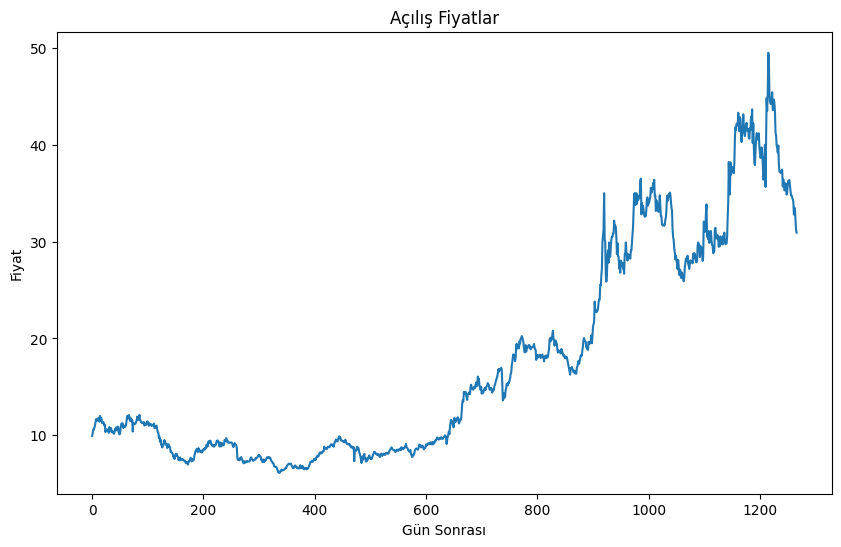

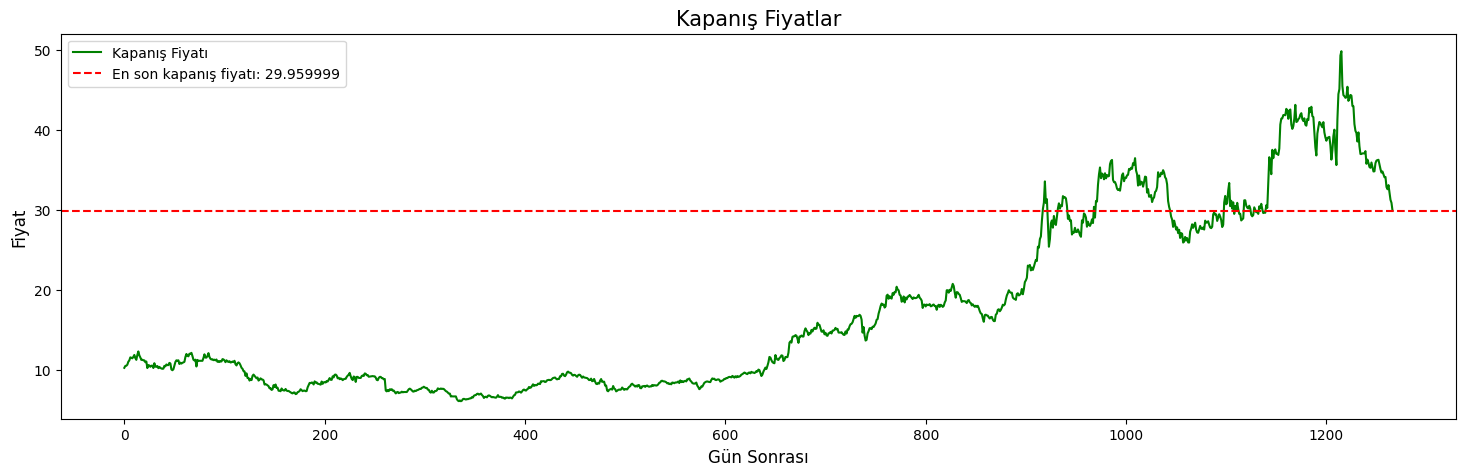

In [4]:
import os
import matplotlib.pyplot as plt

# 'graphed-results' klasörünü oluştur
os.makedirs("graphed-results", exist_ok=True)

open_prices = df['Open']
close_prices = df['Close']

plt.figure(figsize=(10, 6))
plt.title("Açılış Fiyatlar")
plt.xlabel("Gün Sonrası")
plt.ylabel("Fiyat")
plt.plot(open_prices)
plt.show()

plt.figure(figsize=(18, 5))
plt.title("Kapanış Fiyatlar", fontsize=15)
plt.xlabel("Gün Sonrası", fontsize=12)
plt.ylabel("Fiyat", fontsize=12)
plt.plot(close_prices, 'g', label='Kapanış Fiyatı')
plt.axhline(y=close_prices[len(close_prices)-1], color='r', linestyle='--', label=f'En son kapanış fiyatı: {close_prices[len(close_prices)-1]}')
plt.legend()
plt.savefig("graphed-results/close-price.png")
plt.show()


In [5]:
import pandas_ta as pta
relative_strength_indexs = pta.rsi(df[ 'Close'], length= 14).to_list()

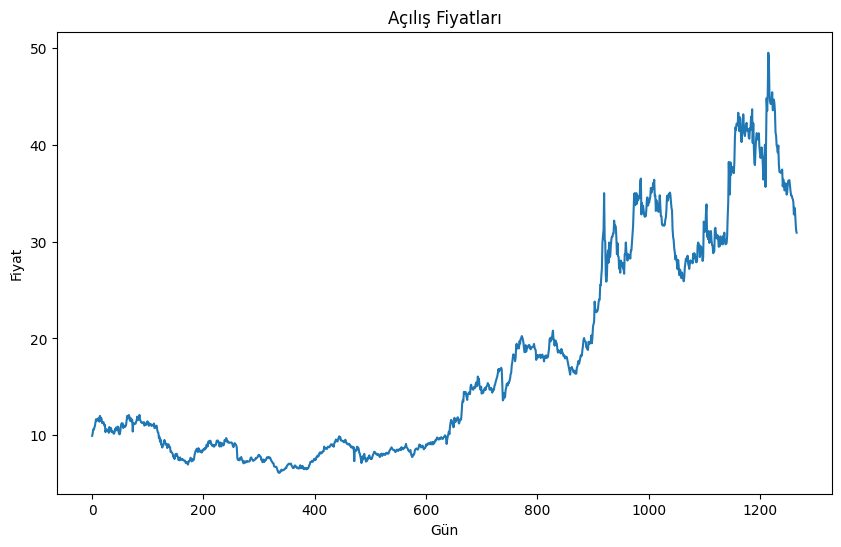

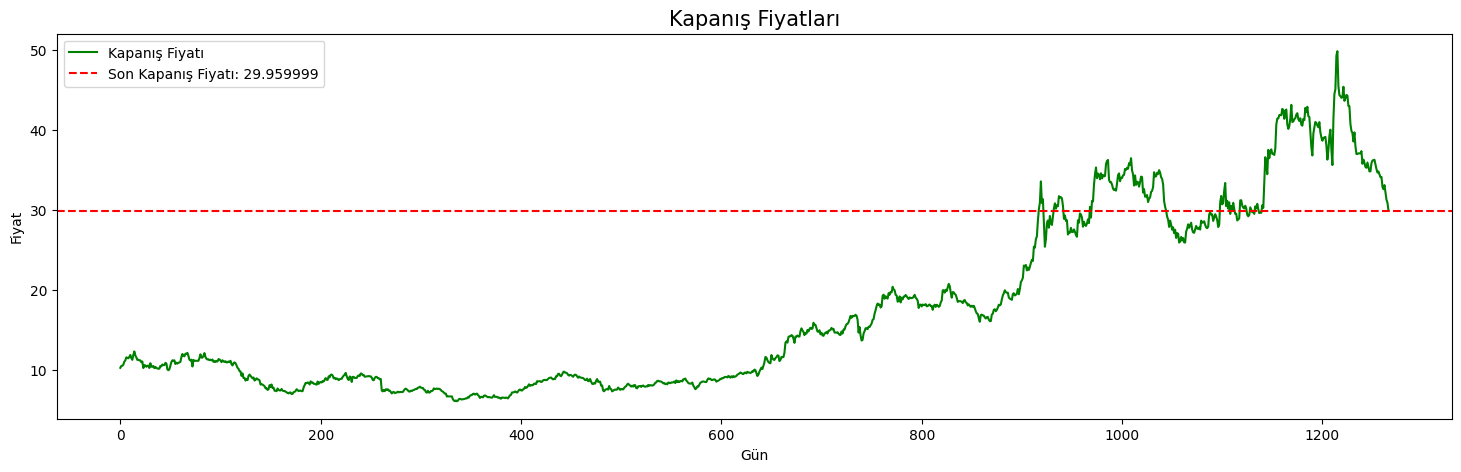

In [6]:
import os
import matplotlib.pyplot as plt

# 'graphed-results' klasörünü oluştur
os.makedirs("graphed-results", exist_ok=True)

açılış_fiyatları = df['Open']
kapanış_fiyatları = df['Close']

plt.figure(figsize=(10, 6))
plt.title("Açılış Fiyatları")
plt.xlabel("Gün")
plt.ylabel("Fiyat")
plt.plot(açılış_fiyatları)
plt.show()

plt.figure(figsize=(18, 5))
plt.title("Kapanış Fiyatları", fontsize=15)
plt.xlabel("Gün")
plt.ylabel("Fiyat")
plt.plot(kapanış_fiyatları, 'g', label='Kapanış Fiyatı')
plt.axhline(y=kapanış_fiyatları[len(kapanış_fiyatları)-1], color='r', linestyle='--', label=f'Son Kapanış Fiyatı: {kapanış_fiyatları[len(kapanış_fiyatları)-1]}')
plt.legend()
plt.savefig("graphed-results/kapanış-fiyatı.png")
plt.show()


## Hisse senedinin genel eğilimini tahmin etmek için göstergelerin uygulanması.


## İlk Metrik: Göreceli Güç Endeksi (RSI)

#### Göreceli Güç Endeksi (RSI), hisse senetleri veya diğer finansal varlıkların aşırı alım veya aşırı satım durumlarını ölçen bir göstergedir. 
#### RSI, genellikle 0 ile 100 arasında bir değer alır. 70'in üzerindeki değerler aşırı alım, 30'un altındaki değerler ise aşırı satım durumu olarak yorumlanır. 
#### RSI, fiyat değişimlerini değerlendirerek varlığın gücünü ve momentumunu ölçer. Trend dönüşleri veya geri dönüşlerin olabileceği düşünülerek yorumlanır. 
#### RSI, genellikle 14 günlük bir periyot kullanılarak hesaplanır ve hisse senedi analizi ve teknik analizde sıkça kullanılan bir göstergedir.

In [7]:
close_prices=close_prices.to_list()

In [8]:
relative_strength_indexs=pta.rsi(df["Close"],length=14).to_list()

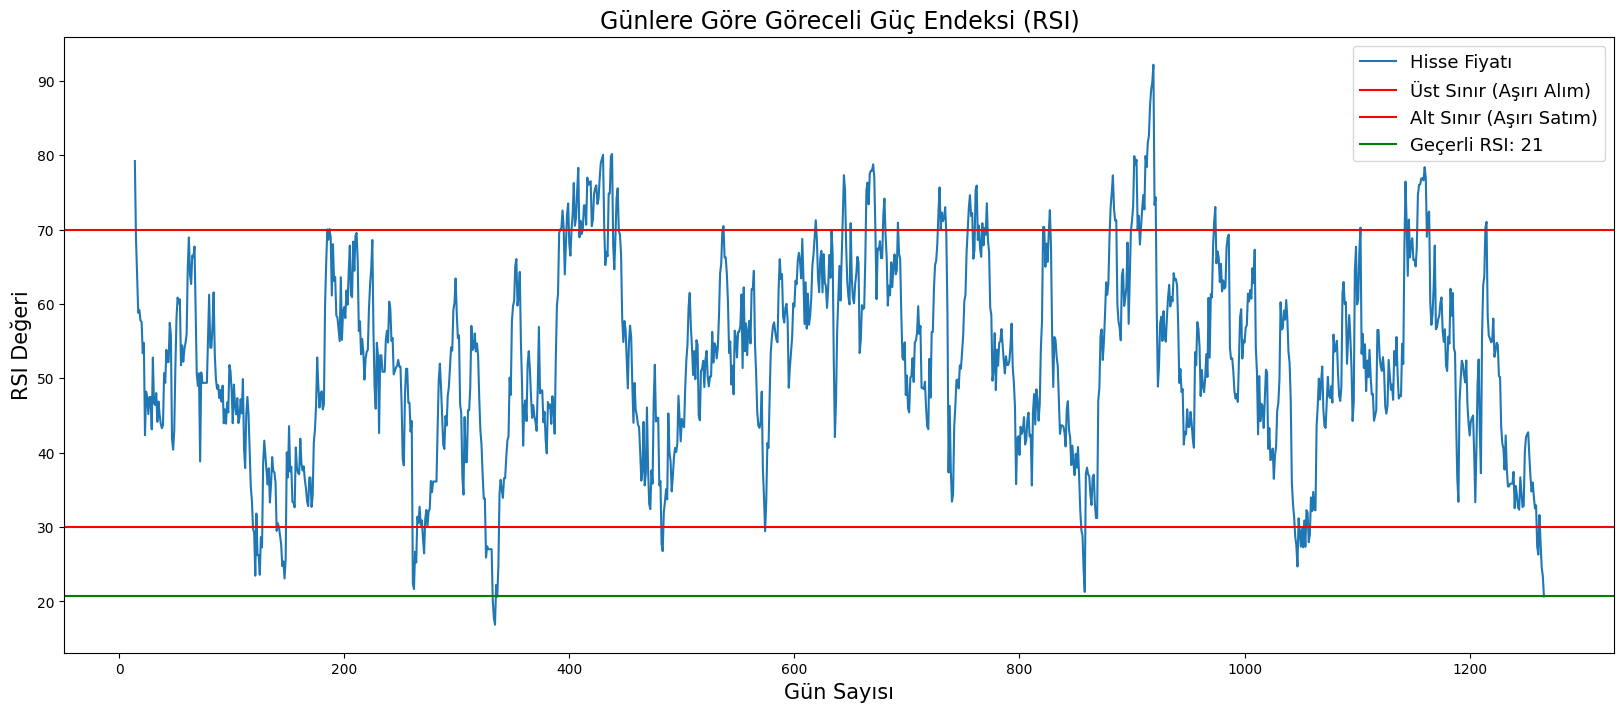

In [9]:
import os
import matplotlib.pyplot as plt

# 'graphed-results' klasörünü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
#plt. figure (figsize=(10, 5)) # Bu matplotlib notebook etkinleştirildiğinde kullanılır
plt.plot(relative_strength_indexs, label='Hisse Fiyatı')
plt.axhline(y=70, color='r', label='Üst Sınır (Aşırı Alım)')
plt.axhline(y=30, color='r', label='Alt Sınır (Aşırı Satım)')
plt.axhline(y=relative_strength_indexs[-1], color='g', label=f'Geçerli RSI: {round(relative_strength_indexs[-1])}')
plt.title("Günlere Göre Göreceli Güç Endeksi (RSI)", fontsize=17)
plt.xlabel("Gün Sayısı", fontsize=15)
plt.ylabel("RSI Değeri", fontsize=15)
plt.legend(prop={'size': 13})
plt.savefig("graphed-results/RSI.png")
plt.show()


# Bollinger Bantları Oluşturma
#### Bollinger Bantları, fiyatın genel eğilimini belirlemek ve aşırı alım veya aşırı satım durumlarını tanımlamak için kullanılan bir gösterge sistemidir. 
#### Bollinger Bantları, fiyatın etrafında bir üst bant ve bir alt bant oluşturur. Ortada ise basit hareketli bir ortalama bulunur. 
#### Bantlar, volatiliteyi yansıtır. Bantlar genişlediğinde volatilite artar, bantlar sıkıştığında volatilite azalır. Fiyat bantların dışına çıktığında, trend dönüşleri veya önemli fiyat hareketleri olabileceği şeklinde yorumlanabilir. 
#### Bollinger Bantları, birçok finansal enstrümanda kullanılır ve trend takibi için önemli bir araçtır.

In [10]:
import statistics

In [11]:
close_avg=df["Close"].rolling(5).mean()
standart_deviations=df["Close"].rolling(5).std()

In [12]:
upper_bollinger_band=[]
lower_bollinger_band=[]

In [13]:
for i in range(len(standart_deviations)):
    upper_bound=close_avg[i]+(standart_deviations[i]*2)
    lower_bound=close_avg[i]-(standart_deviations[i]*2)

    upper_bollinger_band.append(upper_bound)
    lower_bollinger_band.append(lower_bound)

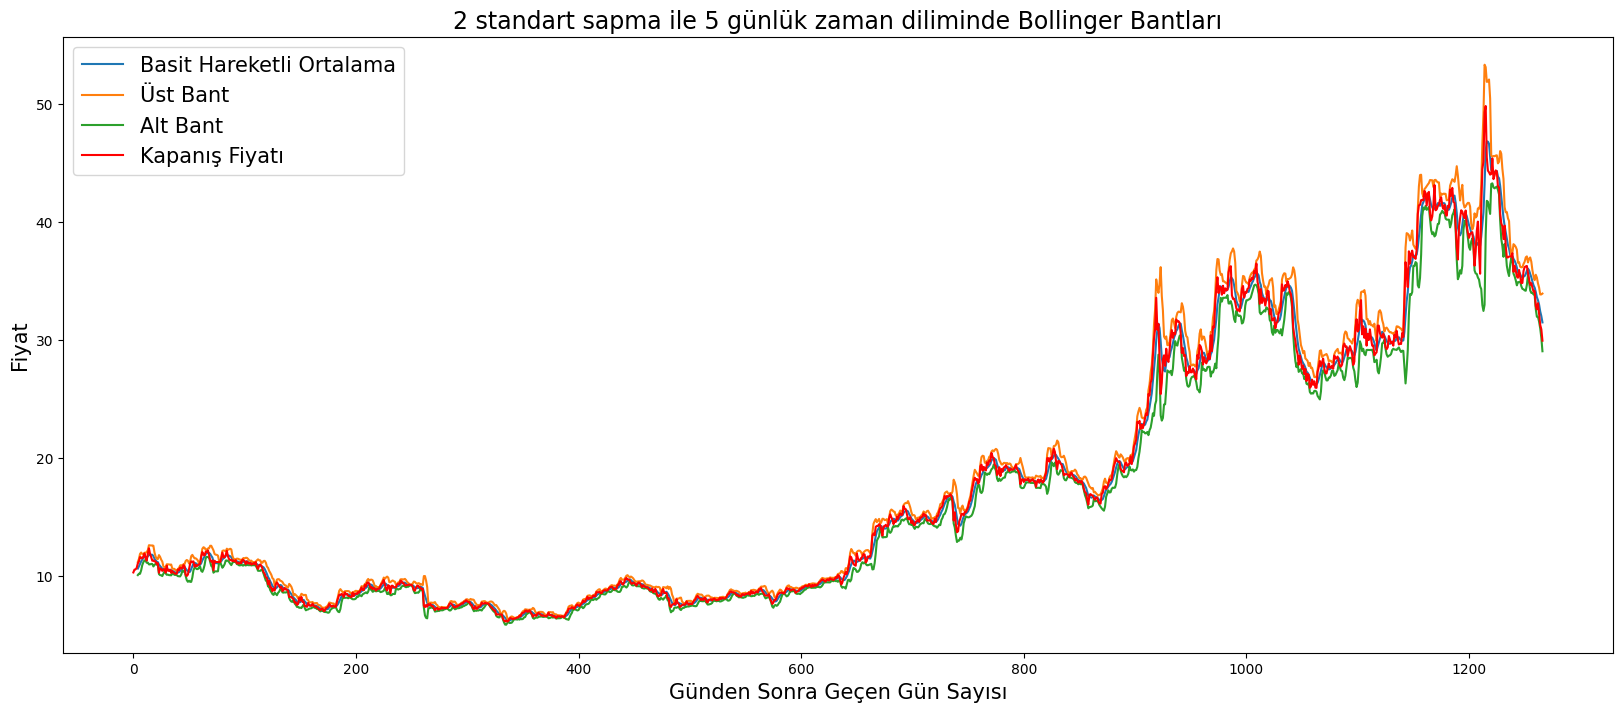

In [14]:
import os
import matplotlib.pyplot as plt

# 'graphed-results' klasörünü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
#plt. figure (figsize=(10, 5)) # Etkileşimli grafikler için açıklama satırını kaldırın
plt.plot(close_avg, label='Basit Hareketli Ortalama')
plt.plot(upper_bollinger_band, label='Üst Bant')
plt.plot(lower_bollinger_band, label='Alt Bant')
plt.plot(close_prices, 'r', label='Kapanış Fiyatı')
plt.title("2 standart sapma ile 5 günlük zaman diliminde Bollinger Bantları", fontsize=17)
plt.xlabel("Günden Sonra Geçen Gün Sayısı", fontsize=15)
plt.ylabel("Fiyat", fontsize=15)
plt.legend(prop={'size': 15})
plt.savefig("graphed-results/SMA_BollingerBands.png")
plt.show()


# Denge Hacmi (OBV)

#### Denge Hacmi (OBV), bir varlığın fiyat hareketleriyle ilişkili bir teknik göstergedir. OBV, ticaret hacmini kullanarak varlık fiyatındaki değişikliklerin doğruluk seviyesini belirlemeye çalışır. OBV göstergesi, alıcı ve satıcıların gücünü değerlendirir ve varlık fiyatının yönünü ve trendini tahmin etmeye yardımcı olur.

#### OBV, alıcıların hacim yarattığı günlerde pozitif değerler oluştururken, satıcıların hacim yarattığı günlerde negatif değerler oluşturur. Bu şekilde, OBV'nin toplamı zaman içinde bir çizgi oluşturur. Eğer OBV çizgisi yukarı yönlü bir trend gösteriyorsa, bu genellikle alıcıların güçlü olduğunu ve fiyatın yukarı doğru hareket edebileceğini gösterir. Aksine, OBV çizgisi aşağı yönlü bir trend gösteriyorsa, bu satıcıların güçlü olduğunu ve fiyatın aşağı doğru hareket edebileceğini gösterir.

#### OBV göstergesi, trendlerin devam edip etmeyeceğini belirlemek, fiyat dönüşlerini tahmin etmek ve potansiyel alım-satım sinyallerini belirlemek için kullanılabilir.

In [15]:
volumes=df["Volume"].to_list()

In [16]:
on_balance_volumes=[]
obv=0
on_balance_volumes.append(obv)


for i in range(1,len(volumes)):
    if close_prices[i]>close_prices[i-1]:
        obv+=volumes[i]
        on_balance_volumes.append(obv)
    elif close_prices[i]<close_prices[i-1]:
        obv-=volumes[i]
        on_balance_volumes.append(obv)

    else:
        obv+=0
        on_balance_volumes.append(obv)

#### Bu kodda, on_balance_volumes adında bir boş liste tanımlanıyor. Ardından obv adında bir değişken oluşturuluyor ve başlangıç değeri olarak 0 atanıyor. İlk değeri on_balance_volumes listesine ekleniyor.

#### Daha sonra bir döngü kullanarak volumes listesinin her bir öğesi üzerinde geziniliyor. Döngü 1'den başlayarak listenin uzunluğuna kadar devam ediyor.

#### Döngünün her bir adımında, mevcut kapanış fiyatı (close_prices[i]) bir önceki kapanış fiyatından (close_prices[i-1]) büyükse, obv değeri volumes[i] ile artırılıyor ve bu değer on_balance_volumes listesine ekleniyor.

#### Eğer mevcut kapanış fiyatı bir önceki kapanış fiyatından küçükse, obv değeri volumes[i] kadar azaltılıyor ve bu değer on_balance_volumes listesine ekleniyor.

#### Eğer mevcut kapanış fiyatı bir önceki kapanış fiyatına eşitse, obv değeri değişmiyor ve 0 olarak ekleniyor.

#### Bu işlemler sonucunda on_balance_volumes listesi, her bir adımda hesaplanan On-Balance Volume (OBV) değerlerini içerecektir.

In [17]:
NUM_OF_DAYS_2=5
obv_df=pd.DataFrame(on_balance_volumes)
obv_sma=obv_df.rolling(NUM_OF_DAYS_2).mean()

#### Bu kod parçasında NUM_OF_DAYS_2 adında bir değişken tanımlanıyor ve değeri 5 olarak belirleniyor.

#### Daha sonra on_balance_volumes listesini kullanarak bir DataFrame oluşturuluyor. on_balance_volumes listesinin her bir elemanı bir satır olarak bu DataFrame'e ekleniyor.

#### Sonraki satırda rolling fonksiyonu kullanılarak bir hareketli ortalama hesaplanıyor. NUM_OF_DAYS_2 değeri kullanılarak 5 günlük bir hareketli ortalama elde ediliyor. Hareketli ortalama, obv_df DataFrame'inin üzerinde uygulanıyor.

#### Bu işlem sonucunda obv_sma adında yeni bir DataFrame elde ediliyor, içerisinde 5 günlük hareketli ortalama değerleri bulunuyor.

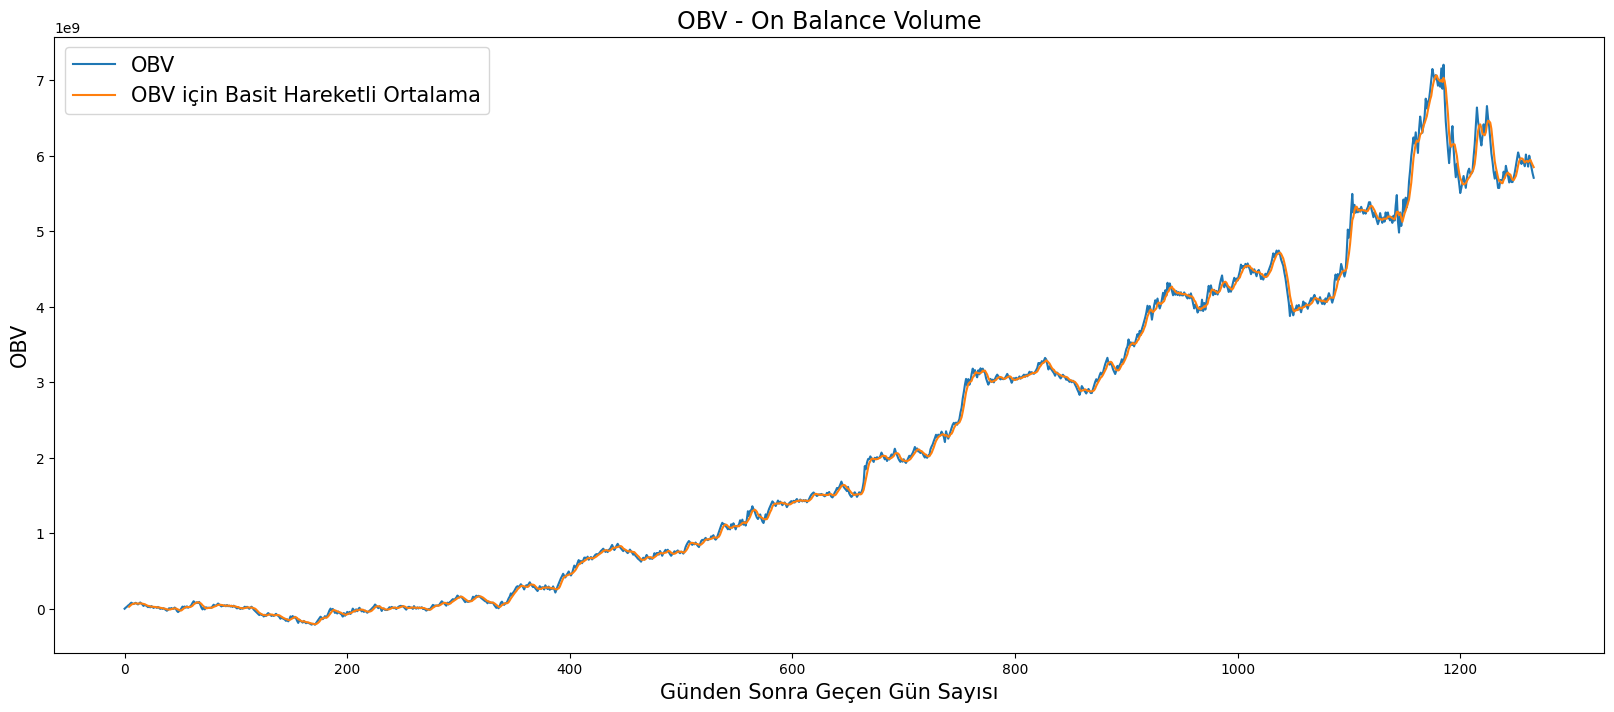

In [18]:
import os
import matplotlib.pyplot as plt

# 'graphed-results' klasörünü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
plt.plot(on_balance_volumes, label='OBV')
plt.plot(obv_sma, label='OBV için Basit Hareketli Ortalama')
plt.title("OBV - On Balance Volume", fontsize=17)
plt.xlabel("Günden Sonra Geçen Gün Sayısı", fontsize=15)
plt.ylabel("OBV", fontsize=15)
plt.legend(prop={'size': 15})
plt.savefig("graphed-results/SMA_OBV_OBV.png")
plt.show()


# MACD (Hareketli Ortalama Yakınsaklık Farkı) Uygulaması
#### MACD (Hareketli Ortalama Yakınsaklık Farkı) Uygulaması, fiyat hareketlerini analiz etmek ve trendi belirlemek için kullanılan bir göstergedir.
#### MACD, 12 günlük ve 26 günlük hareketli ortalamalar arasındaki farkı hesaplar. 
#### MACD hattı, fiyat hareketinin gücünü gösterirken, sinyal hattı MACD hattının daha pürüzsüz bir versiyonudur. 
#### Histogram, MACD hattının sinyal hattından çıkarılmasıyla elde edilir ve momentumu temsil eder. 
#### MACD, alım-satım sinyalleri ve trend değişikliklerini belirlemede kullanılır.


In [19]:
ema12=df["Close"].ewm(span=12,adjust=False).mean()
ema26=df["Close"].ewm(span=26,adjust=False).mean()

macd=ema12-ema26

signal=macd.ewm(span=9,adjust=False).mean()

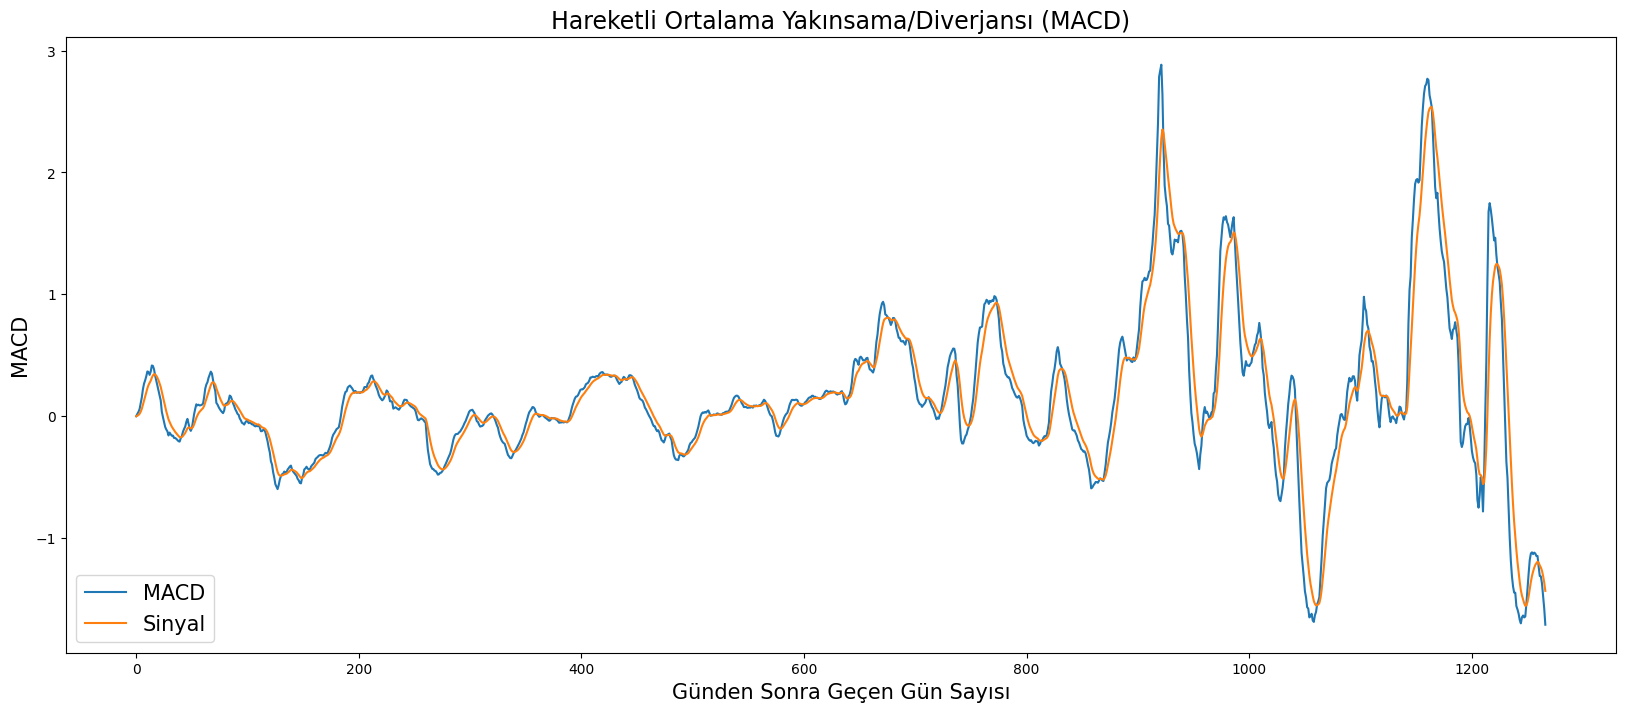

In [20]:
import os
import matplotlib.pyplot as plt

# 'graphed-results' klasörünü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(20, 8))
plt.plot(macd, label='MACD')
plt.plot(signal, label='Sinyal')
plt.title("Hareketli Ortalama Yakınsama/Diverjansı (MACD)", fontsize=17)
plt.ylabel("MACD", fontsize=15)
plt.xlabel("Günden Sonra Geçen Gün Sayısı", fontsize=15)
plt.legend(prop={'size': 15}, loc='lower left')
plt.savefig("graphed-results/MACD.png")
plt.show()


# Direnç ve Destek Çizgileri
#### "Direnç çizgisi", bir varlığın fiyatının yükseldiğinde karşılaştığı zorluğun bir göstergesidir.
#### "Destek çizgisi", bir varlığın fiyatının düştüğünde karşılaştığı zorluğun bir göstergesidir.Bu çizgiler, teknik analizde varlık fiyatlarının trendlerini belirlemek ve gelecekteki fiyat hareketlerini tahmin etmek için kullanılır. 
#### Direnç çizgisi, varlık fiyatının yükselirken karşılaştığı bir direnç seviyesini temsil ederken, destek çizgisi ise varlık fiyatının düşerken karşılaştığı bir destek seviyesini temsil eder. Bu seviyeler, yatırımcılar tarafından dikkate alınarak alım-satım kararları verilir ve potansiyel ticaret fırsatlarını belirlemekte yardımcı olurlar.


In [21]:
high_prices=df["High"].to_list()
low_prices=df["Low"].to_list()

In [22]:
pivot_points=[]
for i in range(len(close_prices)):
    if i==0:
        pivot_points.append(float("nan"))
    else:
        prev_high=high_prices[i-1]
        prev_low=low_prices[i-1]
        prev_close=close_prices[i-1]

        pivot_point=(prev_high+prev_low+prev_close)/3
        pivot_points.append(pivot_point)

#### Direnç Seviyesi 1 = (2 x Pivot Noktası) - Önceki Seansın Düşük Değeri
#### Destek Seviyesi 1 = (2 x Pivot Noktası) - Önceki Seansın Yüksek Değeri
#### Direnç Seviyesi 2 = (Pivot Noktası - Destek Seviyesi 1) + Direnç Seviyesi 1
#### Destek Seviyesi 2 = Pivot Noktası - (Direnç Seviyesi 1 - Destek Seviyesi 1)
#### Direnç Seviyesi 3 = (Pivot Noktası - Destek Seviyesi 2) + Direnç Seviyesi 2
#### Destek Seviyesi 3 = Pivot Noktası - (Direnç Seviyesi 2 - Destek Seviyesi 2)

#### Bu denklemler, bir varlığın Pivot Noktası ve önceki seansın düşük ve yüksek değerleri kullanılarak direnç ve destek seviyelerini hesaplamak için kullanılır.

In [23]:
resistance_l=[]
support_1=[]
resistance_2=[]
support_2=[]

for i in range(len(pivot_points)):
    if i==0:
        resistance_l.append(float("nan"))
        support_1.append(float("nan"))
    else:
        r1=(2*pivot_points[i]) - low_prices[i-1]
        s1=(2*pivot_points[i]) - high_prices[i-1]

        r2=(pivot_points[i]-s1)+r1
        s2=pivot_points[i]-(r1-s1)


        resistance_l.append(r1)
        support_1.append(s1)
        resistance_2.append(r2)
        support_2.append(s2)

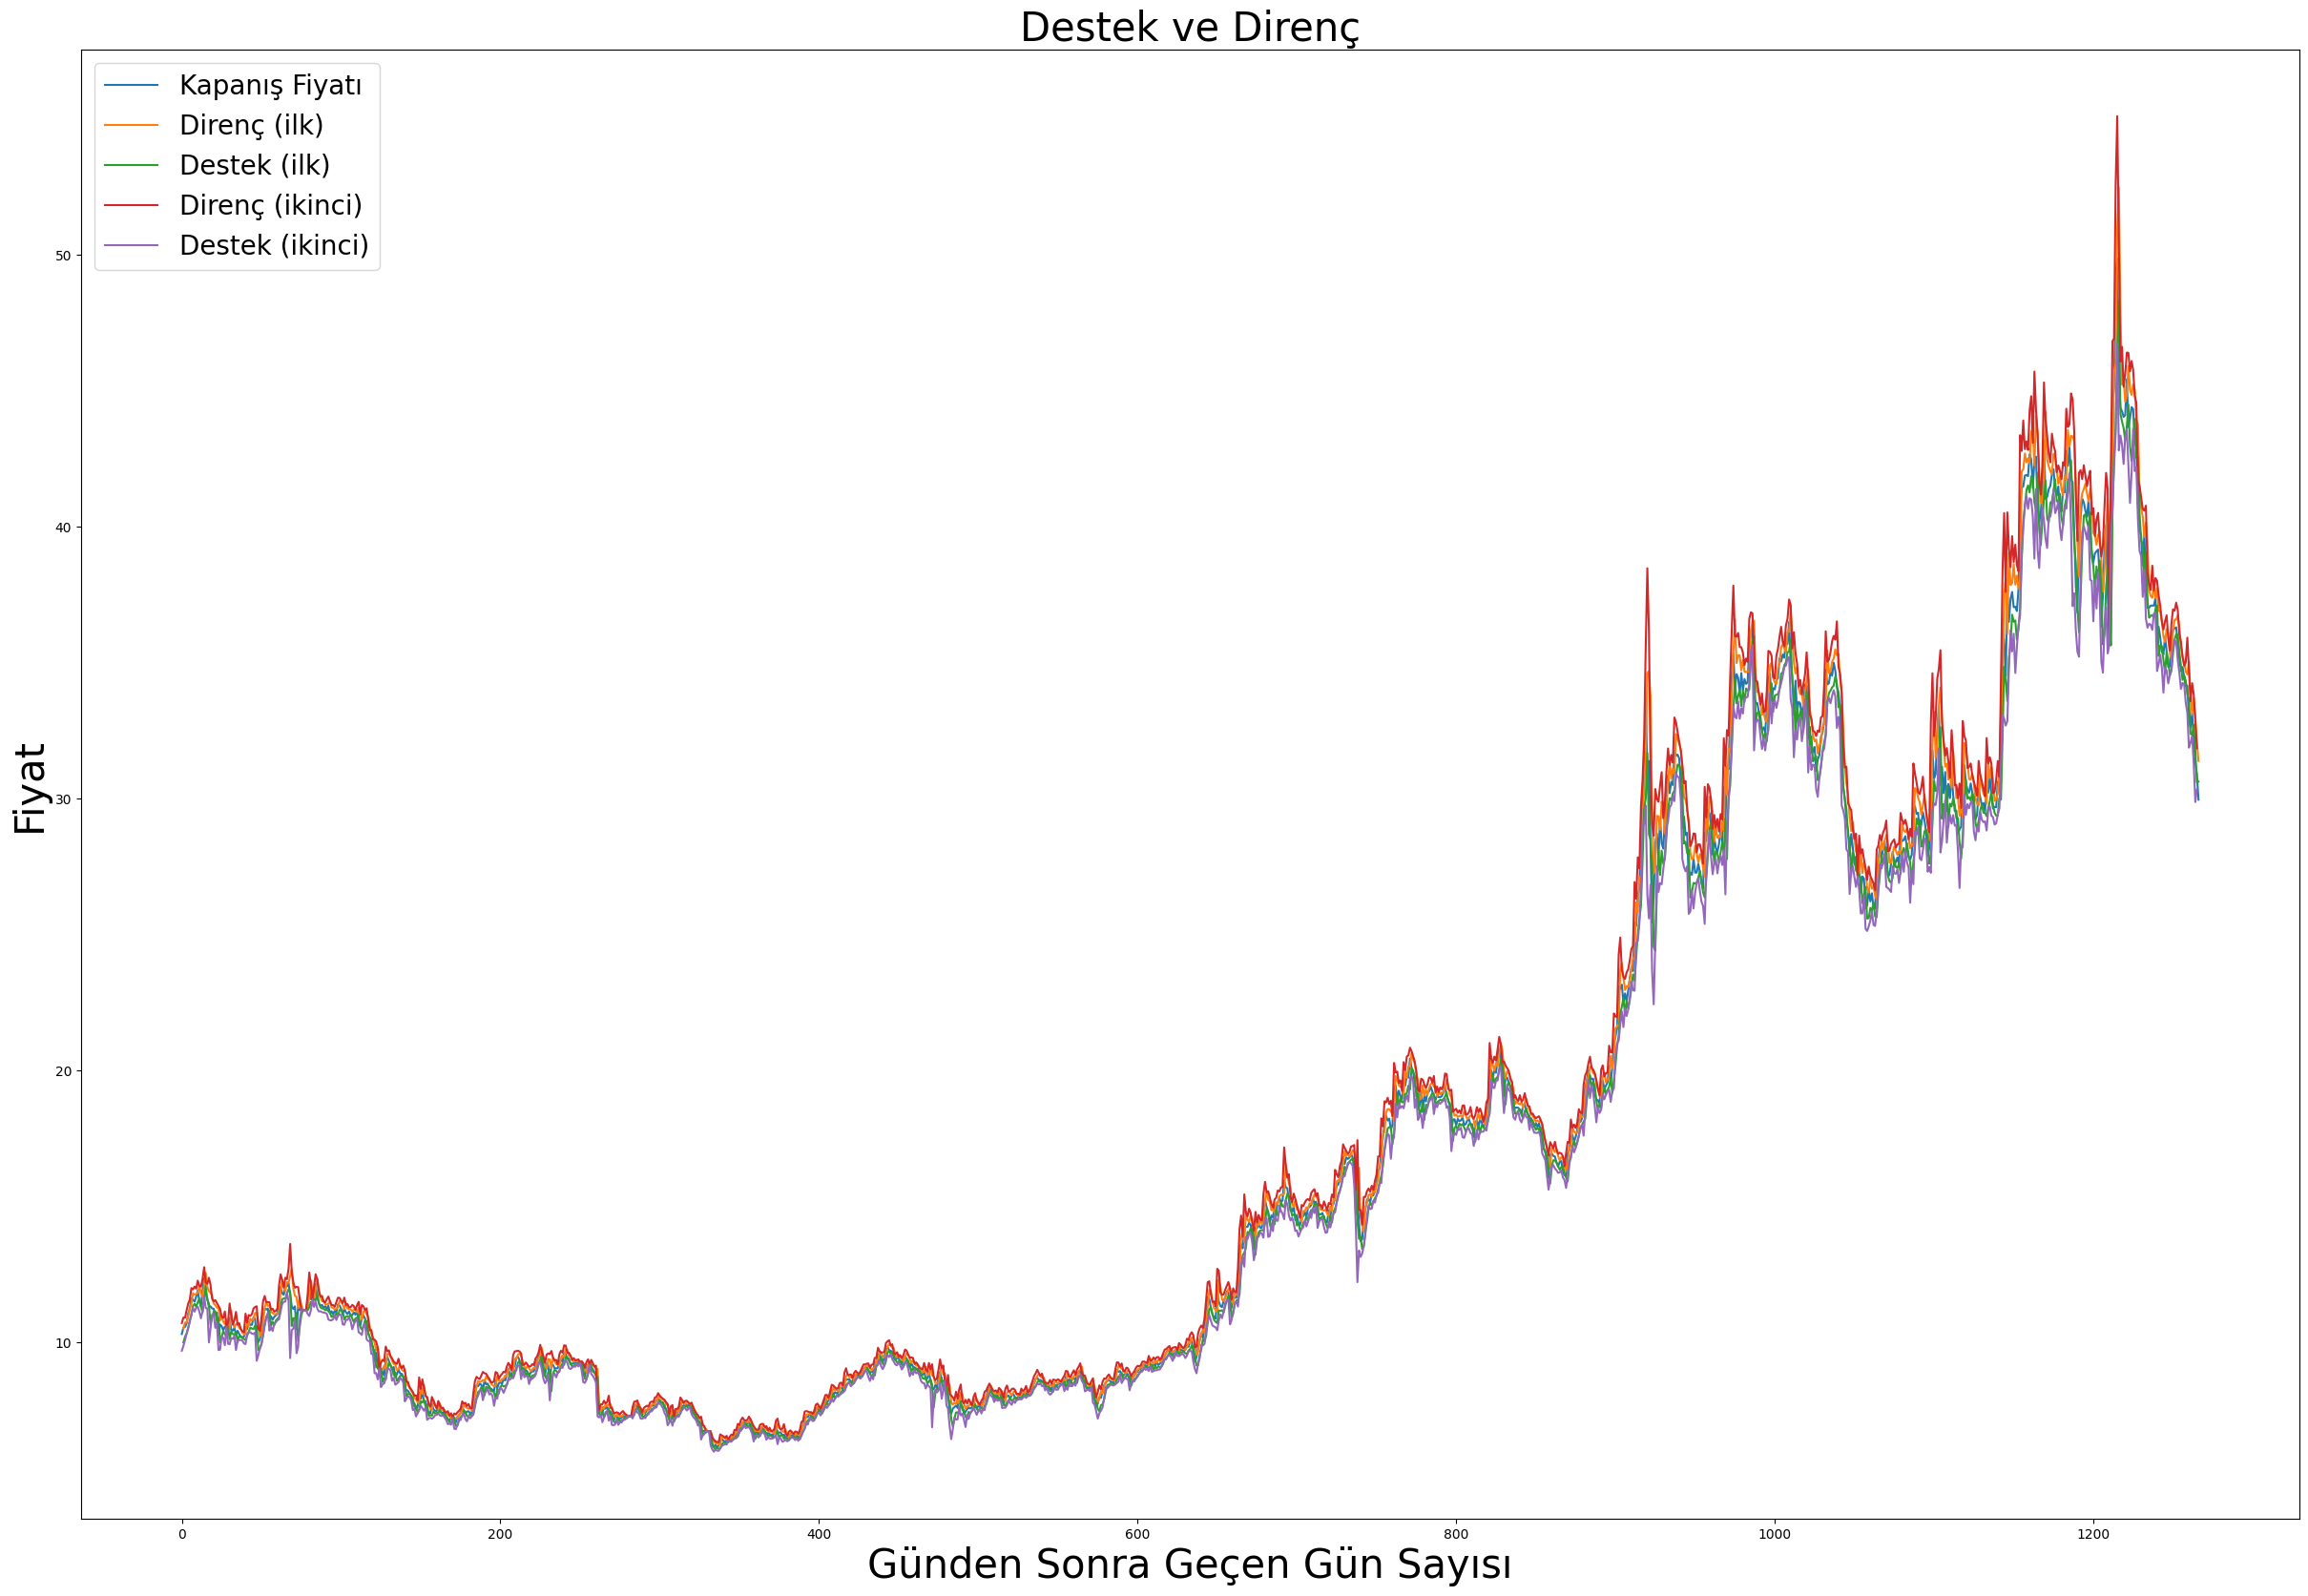

In [24]:
import os
import matplotlib.pyplot as plt

# 'graphed-results' klasörünü oluştur
os.makedirs("graphed-results", exist_ok=True)

plt.figure(figsize=(30, 20))
plt.plot(close_prices, label='Kapanış Fiyatı')
plt.plot(resistance_l, label='Direnç (ilk)')
plt.plot(support_1, label='Destek (ilk)')
plt.plot(resistance_2, label='Direnç (ikinci)')
plt.plot(support_2, label='Destek (ikinci)')
plt.xlabel("Günden Sonra Geçen Gün Sayısı", fontsize=30)
plt.ylabel("Fiyat", fontsize=30)
plt.title("Destek ve Direnç", fontsize=30)
plt.legend(prop={'size': 20})
plt.savefig("graphed-results/support_and_resistance.png")
plt.show()


# Neural Network to predict the future

In [25]:
dataset=close_prices
dataset=np.array(dataset)

In [26]:
dataset

array([10.31    , 10.55    , 10.57    , ..., 31.299999, 30.92    ,
       29.959999])

In [27]:
dataset=np.reshape(dataset,(dataset.shape[0],1))

In [28]:
training=int(np.ceil(len(dataset)*.95))

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

train_data=scaled_data[0:int(training),:]

x_train=[]
y_train=[]
prediction_days=60

for i in range(prediction_days,len(train_data)):
    x_train.append(train_data[i-prediction_days:i,0])
    y_train.append(train_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#### Bu kodda, MinMaxScaler kullanılarak veri kümesi normalize ediliyor. scaler adında bir MinMaxScaler nesnesi oluşturuluyor ve feature_range parametresi (0, 1) olarak ayarlanarak özellik değerlerinin 0 ila 1 aralığına ölçeklendirilmesi sağlanıyor. Daha sonra scaler nesnesi fit_transform yöntemiyle veri kümesine uygulanarak scaled_data oluşturuluyor.

#### Eğitim verileri scaled_data üzerinden alınıyor. train_data değişkenine, scaled_data'nın başından training değişkenine kadar olan kısmı atıyoruz.

#### Daha sonra x_train ve y_train listeleri tanımlanıyor. Bu listelerde eğitim verileri için giriş ve çıkış verileri depolanacak. prediction_days değişkeni 60 olarak tanımlanıyor.

#### Bir döngü kullanarak train_data üzerinde geziniliyor. Her adımda, x_train listesine prediction_days öncesindeki i-prediction_days ila i arasındaki veriler ekleniyor ve y_train listesine i'inci adımdaki veri ekleniyor.

#### Son olarak, x_train ve y_train listeleri numpy dizilerine dönüştürülüyor. x_train yeniden şekillendirilerek (x_train.shape[0], x_train.shape[1], 1) boyutlu hale getiriliyor.

# LSTM Yaklaşımı

In [31]:
model_rnn = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(units=75, return_sequences=True, input_shape=(x_train.shape[1], 1))),
    keras.layers.Bidirectional(keras.layers.LSTM(units=64)),
    keras.layers.Dense(300),
    keras.layers.Dense(32),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

history = model_rnn.fit(x_train, y_train, epochs=20, batch_size=20, callbacks=[callback])


Epoch 1/20
58/58 [==============================] - 8s 40ms/step - loss: 0.0152
Epoch 2/20
58/58 [==============================] - 2s 42ms/step - loss: 0.0055
Epoch 3/20
58/58 [==============================] - 2s 41ms/step - loss: 0.0052
Epoch 4/20
58/58 [==============================] - 2s 41ms/step - loss: 0.0061
Epoch 5/20
58/58 [==============================] - 2s 40ms/step - loss: 0.0044
Epoch 6/20
58/58 [==============================] - 2s 41ms/step - loss: 0.0041
Epoch 7/20
58/58 [==============================] - 2s 41ms/step - loss: 0.0033
Epoch 8/20
58/58 [==============================] - 2s 41ms/step - loss: 0.0030
Epoch 9/20
58/58 [==============================] - 2s 39ms/step - loss: 0.0034
Epoch 10/20
58/58 [==============================] - 2s 40ms/step - loss: 0.0039
Epoch 11/20
58/58 [==============================] - 2s 42ms/step - loss: 0.0035


#### Bu kodda, model_rnn adında bir Sequential modeli oluşturuluyor. Modelin katmanları sırasıyla şu şekildedir:

#### 1-İki yönlü (bidirectional) bir LSTM katmanı, 75 birimli, çıkışları sırasını koruyacak şekilde (return_sequences=True) ve giriş şekli (input_shape) olarak (x_train.shape[1], 1) kullanılarak tanımlanıyor.
#### 2-İkinci bir iki yönlü LSTM katmanı, 64 birimli olarak tanımlanıyor.
#### 3-Bir yoğun (dense) katman, 300 birimli olarak tanımlanıyor.
#### 4-Bir yoğun katman, 32 birimli olarak tanımlanıyor.
#### 5-Bir dropout katmanı, 0.5 oranında dropout uygulayacak şekilde tanımlanıyor.
#### 6-Bir çıkış katmanı, 1 birimli olarak tanımlanıyor.

#### callback adında bir EarlyStopping gerçekleştirilecek geri çağırma (callback) tanımlanıyor. Bu, eğitimde kaybın takip edilerek, belirli bir sabır (patience) süresinden sonra eğitimin durdurulmasını sağlar.

#### model_rnn compile edilerek optimizer olarak 'adam' ve kayıp fonksiyonü olarak 'mean_squared_error' kullanılıyor.

#### Son olarak, model eğitimi x_train ve y_train veri setleriyle yapılıyor. Epoch sayısı 20, batch boyutu 20 ve geri çağırma (callback) olarak callback kullanılıyor.

In [32]:
# model_rnn=keras.Sequential([
#     keras.layers.Bidirectional(keras.layers.LSTM(units=75,
#                                         return_sequences=True,
#                                         input_shape=(x_train.shape[1],1))),
#     keras.layers.Bidirectional(keras.layers.LSTM(units=64)),
#     keras.layers.Dense(300),
#     keras.layers.Dense(32),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1)])

In [33]:
# callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)

# model_rnn.compile(optimizer="adam",
#                   loss="mean_squared_error")
# history=model_rnn.fit(x_train,y_train,epochs=20,batch_size=20)

In [34]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 150)          46200     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              110080    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 300)               38700     
                                                                 
 dense_1 (Dense)             (None, 32)                9632      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [35]:
#model_rnn.save("test-model-v1.1/")

In [36]:
test_data=scaled_data
x_test=[]
y_test=[]

for i in range(prediction_days,len(test_data)):
    x_test.append(test_data[i-prediction_days:i,0])
    y_test.append(test_data[i,0])

x_test=np.array(x_test)
print(x_test.shape)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predictions=model_rnn.predict(x_test)
predictions=scaler.inverse_transform(predictions)

(1207, 60)
38/38 [==============================] - 2s 16ms/step


#### Bu kod, scaled_data olarak adlandırılan test verilerini kullanarak RNN modeliyle tahminler yapar. Test verileri, belirli bir prediction_days sayısı dikkate alınarak önceden hazırlanır. Her bir tahmin için prediction_days kadar önceki veri noktaları giriş olarak kullanılır. Tahminler, model_rnn.predict fonksiyonuyla elde edilir. Elde edilen tahminler ölçeklendirme işlemi tersine çevrilerek gerçek fiyat değerlerine dönüştürülür.

In [37]:
y_test=np.array(y_test)

In [38]:
predictions[0:5]

array([[10.35011 ],
       [10.373593],
       [10.50988 ],
       [10.703657],
       [10.827576]], dtype=float32)

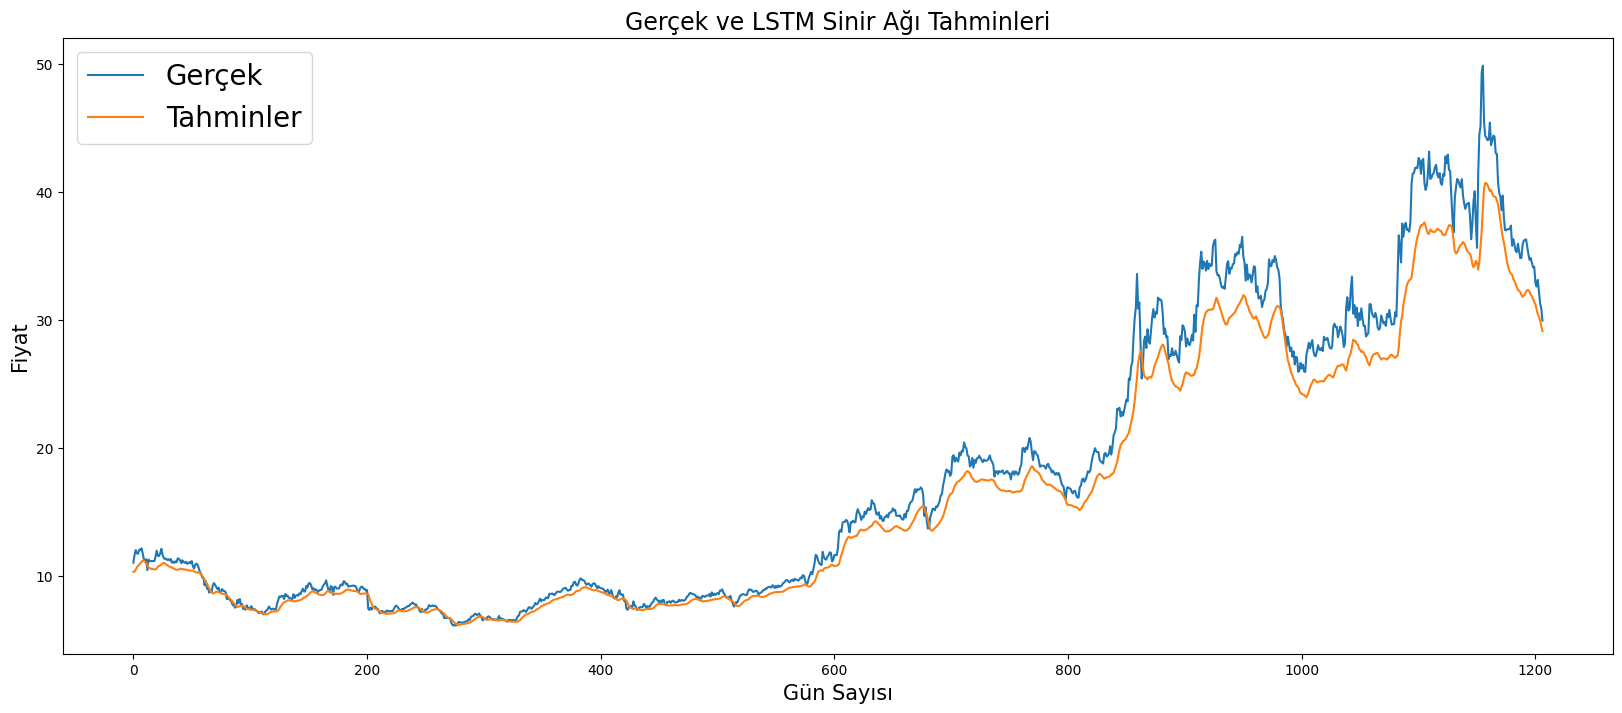

In [39]:
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Gerçek')
plt.plot(predictions, label='Tahminler')
plt.title("Gerçek ve LSTM Sinir Ağı Tahminleri", fontsize=17)
plt.xlabel("Gün Sayısı", fontsize=15)
plt.ylabel("Fiyat", fontsize=15)
plt.legend(prop={'size': 20})
plt.show()


# Transformer Yaklaşımı

In [40]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = keras.layers.Dropout(dropout)(x)
    res = x + inputs

    x = keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = keras.layers.Dropout(dropout)(x)
    x = keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


#### Bu kod, bir Transformer bloğunu oluşturan transformer_encoder adlı bir işlev içerir.

#### İşlev, giriş verilerini ve diğer parametreleri alır. Giriş verileri inputs olarak tanımlanır.

#### İşlev, giriş verilerini Layer Normalization işleminden geçirir. Bu, giriş verilerinin özelliklerini normalleştirir.

#### Daha sonra, Multi-Head Attention mekanizması kullanılarak giriş verileri üzerinde dikkat ağırlıkları hesaplanır. Bu mekanizma, giriş verileri üzerindeki farklı dikkat odaklarını birleştirir.

#### Sonrasında, dropout uygulanır. Dropout, ağın öğrenme sırasında rastgele bir şekilde bazı nöronları devre dışı bırakarak overfitting'i azaltmaya yardımcı olur.

#### Bu adımlardan sonra, bir geçiş bağlantısı oluşturulur. İlk giriş verileri ile dikkat ağırlıklarının ve dropout'un çıktısı toplanır.

#### Daha sonra, çıktı verileri üzerinde tekrar Layer Normalization işlemi uygulanır.

#### Ardından, Conv1D işlevi kullanılarak özellik haritası oluşturulur. Bu işlem, belirli bir filtre boyutu ve aktivasyon fonksiyonu kullanarak verileri işler.

#### Son olarak, dropout uygulanır ve son bir Conv1D işlemiyle giriş verileri ile birlikte çıkışa eklenir.

#### Sonuç olarak, Transformer bloğu oluşturulur ve çıkış döndürülür. Bu blok, bir veya daha fazla kez tekrarlanarak bir Transformer modeli oluşturulabilir.

In [41]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs=keras.input(shape=input_shape)
    x=inputs

    for _ in range(num_transformer_blocks):
        x=transformer_encoder(x,head_size,num_heads,ff_dim,dropout)

    x=keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x=keras.layers.Dense(dim,activation="elu")(x)
        x=keras.layers.Dropout(mlp_dropout)(x)

    outputs=keras.layers.Dense(1,activation="linear")(x)
    return keras.Model(inputs,outputs)

#### Bu kod, bir Transformer modeli oluşturmak için kullanılan build_model adlı bir işlev içerir. İşlev, verilen parametrelere dayalı olarak bir Keras modeli oluşturur.

#### İşlev, giriş şekli ve boyutunu belirleyen bir input_shape parametresi alır. Bu parametre, modelin giriş verilerinin şeklini tanımlamak için kullanılır.

#### İşlev, giriş katmanını tanımlar ve inputs değişkenine atar. Ardından, belirtilen sayıda Transformer bloğunu oluşturmak için bir döngü kullanır. Her bir blok için transformer_encoder işlevini çağırır ve çıktıyı x değişkenine atar.

#### Sonraki adımda, GlobalAveragePooling1D katmanı kullanılarak veri özellikleri toplanır. Bu, her öznitelik kanalı için ortalama değeri hesaplar.

#### Daha sonra, belirtilen sayıda gizli katman oluşturmak için bir döngü kullanılır. Her bir gizli katman için Dense işlevi çağrılır ve aktivasyon olarak "elu" kullanılır. Ardından, her bir gizli katmandan sonra belirtilen oranda dropout uygulanır.

#### Son olarak, bir çıkış katmanı oluşturulur. Bu katman, tek bir çıkış düğümüne sahiptir ve aktivasyon olarak "linear" kullanır.

#### Oluşturulan model, keras.Model sınıfı kullanılarak giriş ve çıkışlarla birlikte tanımlanır ve döndürülür.

In [42]:
# callbacks=[keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)]

In [43]:
# input_shape=x_train.shape[1:]

In [44]:
# model = build_model(
#     input_shape,
#     head_size=46,
#     num_heads=60,
#     ff_dim=55,
#     num_transformer_blocks=5,
#     mlp_units=[400],
#     mlp_dropout=0.2,
#     dropout=0.14,
# )

# model.compile(
#     loss="mean_squared_error",
#     optimizer=keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-9, beta_1=0.9, beta_2=0.98),
#     metrics=["mean_squared_error"],
# )

# history = model.fit(
#     x_train,
#     y_train,
#     epochs=10,
#     batch_size=20,
#     validation_split=0.1,
#     callbacks=callbacks,
# )


In [45]:
# callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
# input_shape = x_train.shape[1:]
# model = build_model(
#     input_shape,
#     head_size=46,
#     num_heads=60,
#     ff_dim=55,
#     num_transformer_blocks=5,
#     mlp_units=[400],
#     mlp_dropout=0.2,
#     dropout=0.14,
# )

# model.compile(
#     loss="mean_squared_error",
#     optimizer=keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-9, beta_1=0.9, beta_2=0.98),
#     metrics=["mean_squared_error"],
# )

# history = model.fit(
#     x_train,
#     y_train,
#     epochs=10,
#     batch_size=20,
#     validation_split=0.1,
#     callbacks=callbacks,
# )


In [46]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = keras.layers.Dropout(dropout)(x)
    res = x + inputs

    x = keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = keras.layers.Dropout(dropout)(x)
    x = keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = keras.layers.Dense(dim, activation="elu")(x)
        x = keras.layers.Dropout(mlp_dropout)(x)

    outputs = keras.layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
input_shape = x_train.shape[1:]
model = build_model(
    input_shape,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[400],
    mlp_dropout=0.2,
    dropout=0.14,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4, epsilon=1e-9, beta_1=0.9, beta_2=0.98),
    metrics=["mean_squared_error"],
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=20,
    validation_split=0.1,
    callbacks=callbacks,
)


Epoch 1/10
52/52 [==============================] - 48s 794ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 2/10
52/52 [==============================] - 41s 784ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 3/10
52/52 [==============================] - 41s 786ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 4/10
52/52 [==============================] - 43s 824ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 5/10
52/52 [==============================] - 42s 797ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 6/10
52/52 [==============================] - 40s 772ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7/10
52/52 [====

#### Bu kod, bir Transformer modeli oluşturmak için kullanılan işlevleri ve modelin derlenmesi ile eğitimini içerir. transformer_encoder işlevi, girişe uygulanacak bir Transformer kodlayıcı katmanını tanımlar. Bu katman, girişi normalleştirir, çoklu başlı dikkat uygular, bir dropout katmanı kullanır ve ardından bir artık bağlantısı oluşturur. CNN katmanıyla öznitelikler çıkarılır ve son olarak bir artık bağlantısı daha eklenir.

#### build_model işlevi, verilen parametrelere dayalı olarak bir Transformer modeli oluşturur. Model, belirtilen sayıda Transformer bloğunu içerir. Bloklar arasında veri işlemek için girişler geçirilir ve son bloktan sonra elde edilen çıktılar üzerinde bir Global Average Pooling işlemi uygulanır. Ardından, bir veya daha fazla gizli katman ve bir çıkış katmanıyla tam bağlantılı bir ağ oluşturulur.

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 60, 1)       2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 60, 1)       19321       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

In [48]:
#model.save("transformer-model-v1.0/")

In [49]:
transformer_predictions=model.predict(x_test)

38/38 [==============================] - 19s 502ms/step


In [50]:
transformer_predictions=scaler.inverse_transform(transformer_predictions)

In [51]:
y_test=np.array(y_test)

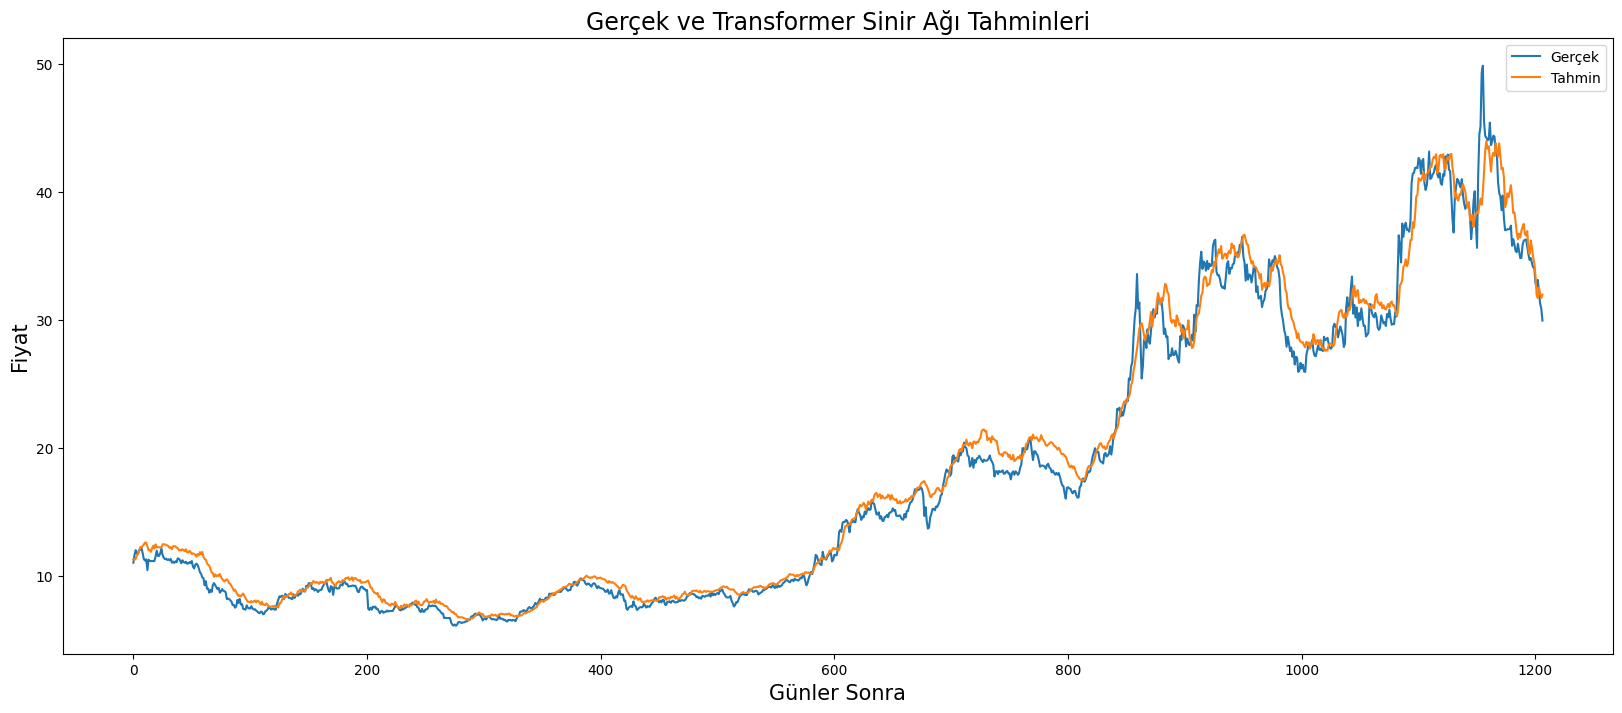

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Gerçek')
plt.plot(transformer_predictions, label='Tahmin')
plt.xlabel('Günler Sonra', fontsize=15)
plt.ylabel('Fiyat', fontsize=15)
plt.title('Gerçek ve Transformer Sinir Ağı Tahminleri', fontsize=17)
plt.legend(prop={'size': 20})
plt.legend()
plt.show()


In [53]:
l1 = []
l2 = []
epsilon = 1e-10

for i in range(len(predictions)):
    rnn_loss = np.log(abs((y_test[i] - predictions[i]) + epsilon))
    transformer_loss = np.log(abs((y_test[i] - transformer_predictions[i]) + epsilon))
    l1.append(rnn_loss)
    l2.append(transformer_loss)


#### predictions ve transformer_predictions dizileri arasındaki kaybı hesaplayarak l1 ve l2 listelerine kaydediyor. Bu hesaplama, her iki tahminin gerçek değerden ne kadar farklı olduğunu ölçmek için np.log ve abs fonksiyonlarını kullanıyor. epsilon değeri, sıfıra yakın değerlerin logaritmasının alınması sırasında oluşabilecek hataları önlemek için ekleniyor.

In [54]:
len(l1)==len(l2)

True

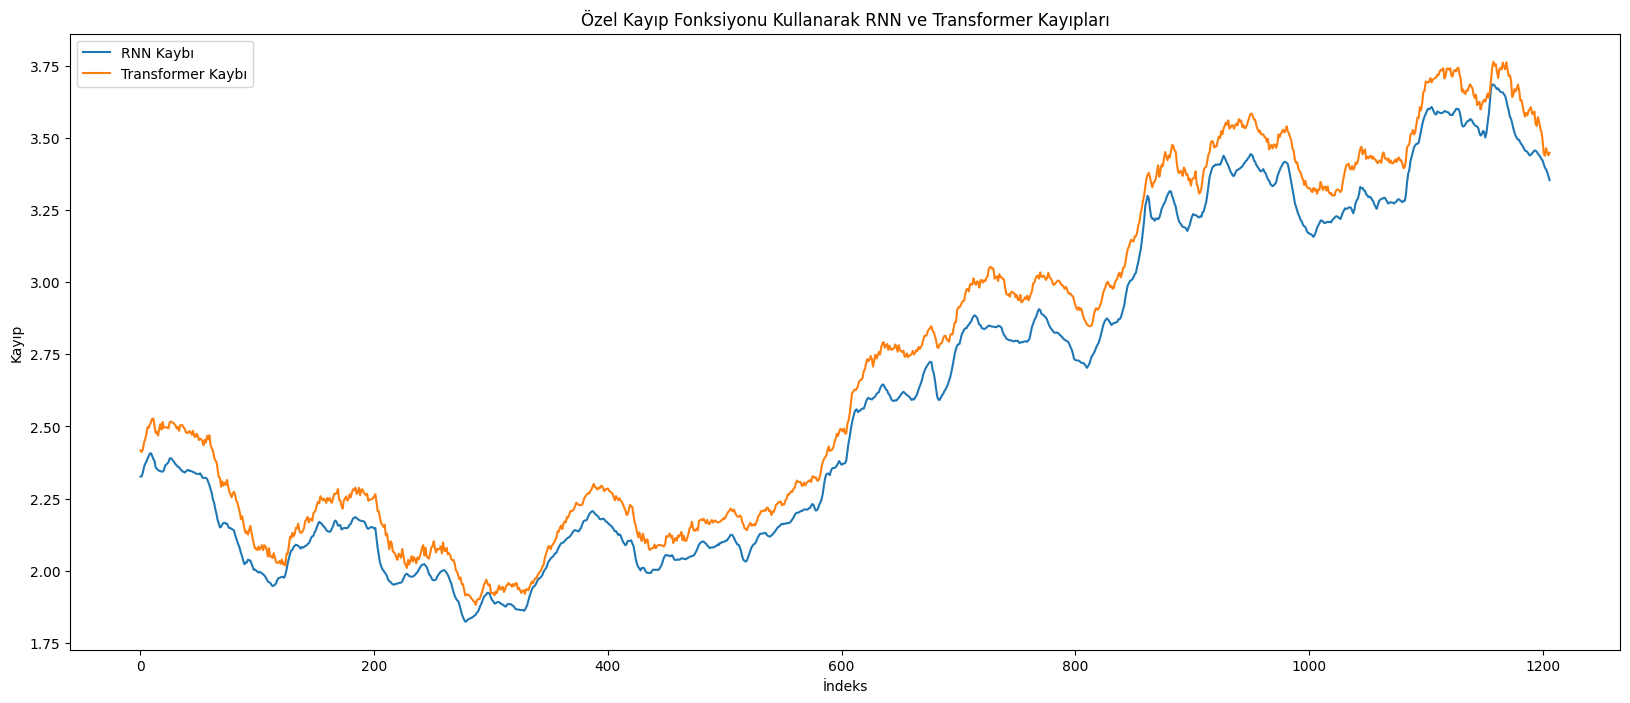

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(l1, label='RNN Kaybı')
plt.plot(l2, label='Transformer Kaybı')
plt.title("Özel Kayıp Fonksiyonu Kullanarak RNN ve Transformer Kayıpları")
plt.ylabel("Kayıp")
plt.xlabel("İndeks")
plt.legend()
plt.show()
